In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [1]:
import pandas as pd

df = pd.read_csv("Breast_cancer_data.csv")  # or use exact filename
df.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Baseline Model – No Balancing

# Split data into features (X) and target (y)
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)

# Predict
baseline_preds = baseline_model.predict(X_test)

# Evaluation
print(" Baseline Model – Confusion Matrix:")
print(confusion_matrix(y_test, baseline_preds))

print("\n Baseline Model – Classification Report:")
print(classification_report(y_test, baseline_preds))

 Baseline Model – Confusion Matrix:
[[41  2]
 [ 4 67]]

 Baseline Model – Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [3]:
#  Experiment 1 – RandomForest with class_weight='balanced'
# Train RandomForest with balanced class weights
balanced_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
balanced_model.fit(X_train, y_train)

# Predict using the balanced model
balanced_preds = balanced_model.predict(X_test)

# Evaluation for the balanced model
print("Balanced Model – Confusion Matrix:")
print(confusion_matrix(y_test, balanced_preds))

print("\n Balanced Model – Classification Report:")
print(classification_report(y_test, balanced_preds))


#This model now tells Python:
#“Give more importance to malignant cases (class 1) during training, even if they're fewer in number.”
#This usually improves recall, especially for cancer detection where missing a tumor is dangerous.



Balanced Model – Confusion Matrix:
[[42  1]
 [ 4 67]]

 Balanced Model – Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# ex 2 SMOTE (Synthetic Minority Oversampling Technique)

In [4]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split original data
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model
smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
smote_model.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_smote = smote_model.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))


Confusion Matrix:
 [[42  1]
 [ 6 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



In [6]:
# ex 3 
from sklearn.linear_model import LogisticRegression

# Create a new model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Confusion Matrix:
 [[40  3]
 [ 5 66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [7]:
# Experiment 4
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment 4: Random Forest + Threshold Tuning
model_exp4 = RandomForestClassifier(n_estimators=100, random_state=42)
model_exp4.fit(X_train, y_train)

# Get predicted probabilities
y_probs = model_exp4.predict_proba(X_test)[:, 1]  # prob for class 1 (cancer)

# Adjust threshold (from 0.5 → 0.3)
y_pred_exp4 = (y_probs >= 0.3).astype(int)

# Evaluation
print(" Experiment 4 – Confusion Matrix:\n", confusion_matrix(y_test, y_pred_exp4))
print("\n Classification Report:\n", classification_report(y_test, y_pred_exp4))


 Experiment 4 – Confusion Matrix:
 [[38  5]
 [ 0 71]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

# Define the three similar models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Combine with soft voting
voting_similar_trees = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('et', et_clf)
    ],
    voting='soft'
)

# Train
voting_similar_trees.fit(X_train, y_train)

# Predict probs and apply threshold
y_probs_voting_similar = voting_similar_trees.predict_proba(X_test)[:, 1]
y_pred_voting_similar = (y_probs_voting_similar >= 0.3).astype(int)

# Evaluation
print("Voting (RF + GB + ET) – Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting_similar))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting_similar))


Voting (RF + GB + ET) – Confusion Matrix:
 [[39  4]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [9]:
# Fit individual models
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)



ExtraTreesClassifier(random_state=42)

In [10]:
# Get individual predicted probabilities
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
gb_probs = gb_clf.predict_proba(X_test)[:, 1]
et_probs = et_clf.predict_proba(X_test)[:, 1]

# Apply threshold
rf_preds = (rf_probs >= 0.3).astype(int)
gb_preds = (gb_probs >= 0.3).astype(int)
et_preds = (et_probs >= 0.3).astype(int) 


In [11]:
# Get probabilities from the voting classifier
voting_probs = voting_similar_trees.predict_proba(X_test)[:, 1]

# Apply the same threshold of 0.3
voting_preds = (voting_probs >= 0.3).astype(int)


In [12]:
preds_df = pd.DataFrame({
    'True_Label': y_test.values,
    'RF_Pred': rf_preds,
    'GB_Pred': gb_preds,
    'ET_Pred': et_preds,
    'Voting_Pred': voting_preds
})

preds_df.index = X_test.index
preds_df.head(10)


,True_Label,RF_Pred,GB_Pred,ET_Pred,Voting_Pred
204,1,1,1,1,1
70,0,0,0,0,0
131,0,0,0,0,0
431,1,1,1,1,1
540,1,1,1,1,1
567,0,0,0,0,0
369,0,0,0,0,0
29,0,1,1,0,0
81,1,1,1,1,1
477,1,1,1,1,1


In [13]:
from sklearn.ensemble import VotingClassifier

# New voting model with just RF and ET
voting_rf_et = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('et', et_clf)
    ],
    voting='soft'
)

# Train it
voting_rf_et.fit(X_train, y_train)

# Predict
voting_probs_rf_et = voting_rf_et.predict_proba(X_test)[:, 1]
voting_preds_rf_et = (voting_probs_rf_et >= 0.3).astype(int)

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report

print("Voting (RF + ET) – Confusion Matrix:\n", confusion_matrix(y_test, voting_preds_rf_et))
print("\nClassification Report:\n", classification_report(y_test, voting_preds_rf_et))


Voting (RF + ET) – Confusion Matrix:
 [[39  4]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [14]:
# the best
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Split data
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit individual models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)

# Voting model (soft voting)
voting_rf_et = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('et', et_clf)
    ],
    voting='soft'
)
voting_rf_et.fit(X_train, y_train)

# Predictions with threshold 0.3
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
et_probs = et_clf.predict_proba(X_test)[:, 1]
voting_probs = voting_rf_et.predict_proba(X_test)[:, 1]

rf_preds = (rf_probs >= 0.3).astype(int)
et_preds = (et_probs >= 0.3).astype(int)
voting_preds = (voting_probs >= 0.3).astype(int)

# Evaluation
print("Voting (RF + ET) – Confusion Matrix:\n", confusion_matrix(y_test, voting_preds))
print("\nClassification Report:\n", classification_report(y_test, voting_preds))

# Comparison table
preds_df = pd.DataFrame({
    'True_Label': y_test.values,
    'RF_Pred': rf_preds,
    'ET_Pred': et_preds,
    'Voting_Pred': voting_preds
}, index=X_test.index)

print("\nSample Predictions:\n")
print(preds_df.head(10))

# Optional: disagreements only
disagreements = preds_df[(preds_df['RF_Pred'] != preds_df['ET_Pred'])]
print("\nDisagreements Between RF and ET:\n")
print(disagreements)


Voting (RF + ET) – Confusion Matrix:
 [[39  4]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


Sample Predictions:

     True_Label  RF_Pred  ET_Pred  Voting_Pred
204           1        1        1            1
70            0        0        0            0
131           0        0        0            0
431           1        1        1            1
540           1        1        1            1
567           0        0        0            0
369           0        0        0            0
29            0        1        0            0
81            1        1        1            1
477           1        1        1            1

Disagreements Between RF and ET:

     True_Label  

In [ ]:
# Visualize feature importances

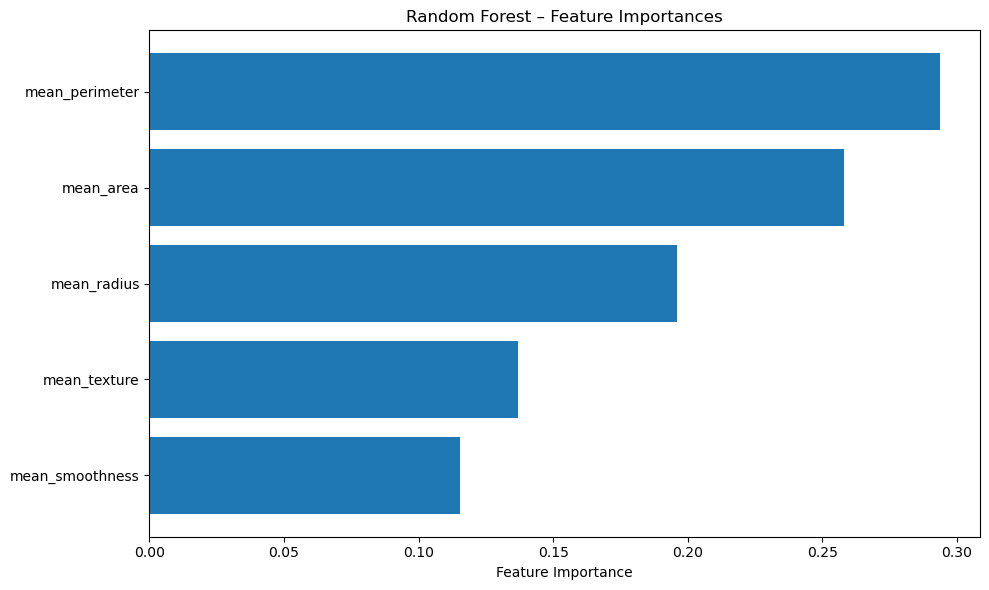

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = rf_clf.feature_importances_
feature_names = X.columns

# Create dataframe
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest – Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# SHAP (SHapley Additive exPlanations) or each prediction, how much did each feature push the model toward “cancer” or “not cancer”?

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Model
rf_clf = RandomForestClassifier(random_state=42)

# Cross-validation (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(rf_clf, X, y, cv=cv)

# Confusion Matrix and Report
print("Confusion Matrix (5-Fold CV):")
print(confusion_matrix(y, y_pred_cv))

print("\nClassification Report:")
print(classification_report(y, y_pred_cv))


Confusion Matrix (5-Fold CV):
[[199  13]
 [ 12 345]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       212
           1       0.96      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569

